# Data Science in Python Project - Chicago Crimes 2001 - Present

This project uses the Chicago Crimes dataset. 
Name: Stephen Connolly
Student Number:15449388

NOTE: Dataset is extremely large(over 1.4 million entries) so Moodle would not accept the file as it was too big. I have included the first 100 lines but for my visualisations to be efficient they will require the full dataset

Link to dataset : https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data

Data Collection

In [4]:
import datetime
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

These cells will need the file paths to be modified as this path is unique to the machine on which the code was developed

In [5]:
# Ensure the file exists
if not os.path.exists( "/Users/Stephen/3rdYear/DS - Semester 2 2018/COMP30760 - DS in Python/Assignment 1/Chicago_Crimes.csv" ):
    print("Missing dataset file")

In [7]:
df_full = pd.read_csv( "/Users/Stephen/3rdYear/DS - Semester 2 2018/COMP30760 - DS in Python/Assignment 1/Chicago_Crimes.csv" )

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
ID                      1048575 non-null int64
Case Number             1048575 non-null object
Date                    1048575 non-null object
Block                   1048575 non-null object
IUCR                    1048575 non-null object
Primary Type            1048575 non-null object
Description             1048575 non-null object
Location Description    1047313 non-null object
Arrest                  1048575 non-null bool
Domestic                1048575 non-null bool
Beat                    1048575 non-null int64
District                1048574 non-null float64
Ward                    921473 non-null float64
Community Area          921363 non-null float64
FBI Code                1048575 non-null object
X Coordinate            1022397 non-null float64
Y Coordinate            744579 non-null float64
Year                    1048575 non-null int64
Updated On              1048

In [9]:
df_full.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1262
Arrest                       0
Domestic                     0
Beat                         0
District                     1
Ward                    127102
Community Area          127212
FBI Code                     0
X Coordinate             26178
Y Coordinate            303996
Year                         0
Updated On                   0
Latitude                303996
Longitude               303996
Location                303996
dtype: int64

In [10]:
df_full.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,3,1144920.0,1898709.0,2015,02/10/2018 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)"


# Data Prepartion/Cleaning/Altering

Dropping various columns that I am not using like latitude and longtitude and location(Long and Lat put together)

In [11]:
df1 = df_full.drop(["Longitude"], axis = 1)

In [12]:
df2 = df1.drop(["Latitude"], axis = 1)
df2.tail(5)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
1048570,2391997,HH703008,10/06/2002 17:00,023XX W MONTANA ST,820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,1432,14.0,1.0,22.0,6,1160305.0,NaN,2002,02/10/2018 15:50,NaN
1048571,2391998,HH699349,03/01/2002 12:00,078XX S EMERALD AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,621,6.0,17.0,71.0,6,1172659.0,NaN,2002,02/10/2018 15:50,NaN
1048572,2391999,HH703000,10/09/2002 13:00,009XX W WEED ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1822,18.0,32.0,8.0,14,1169697.0,1910457.0,2002,02/10/2018 15:50,"(41.909798633, -87.652036281)"
1048573,2392000,HH703014,10/09/2002 14:40,013XX E 48TH ST,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2124,2.0,4.0,39.0,7,1186134.0,NaN,2002,02/10/2018 15:50,NaN
1048574,2392001,HH595231,08/21/2002 05:45:00 AM,031XX S LAKE SHORE DR NB,910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER,False,False,2122,2.0,4.0,35.0,7,1181875.0,NaN,2002,02/10/2018 15:50,NaN


Renaming various columns to make them easier to access/manage

In [13]:
df4 = df2.rename(columns={'Location Description' : 'Location_Description', 'Primary Type' : 'Primary_Type', 'Case Number' : 'Case_Number', 'Community Area' : 'Community_Area', 'FBI Code' : 'FBI_Code', 'X Coordinate' : 'X_Coordinate', 'Y Coordinate' : 'Y_Coordinate', 'Updated On' : 'Updated_On', 'Date' : 'Date_and_Time'})

In [14]:
df4['Ward'].fillna(0, inplace=True)
df4['Community_Area'].fillna(0, inplace=True)


Dropping columns that I am not using

In [15]:
df12 = df4.drop(["Location"], axis = 1)
df13 = df12.drop(["X_Coordinate"], axis = 1)
df5 = df13.drop(["Y_Coordinate"], axis = 1)

Inserting new columns Time and Date

In [16]:
df5.insert(3, 'Time', 0)

In [17]:
df5.head(3)

,ID,Case_Number,Date_and_Time,Time,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
0,10000092,HY189866,03/18/2015 07:44:00 PM,0,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,28.0,25.0,04B,2015,02/10/2018 15:50
1,10000094,HY190059,03/18/2015 11:00:00 PM,0,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,15.0,67.0,26,2015,02/10/2018 15:50
2,10000095,HY190052,03/18/2015 10:45:00 PM,0,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,4.0,39.0,08B,2015,02/10/2018 15:50


In [18]:
df5.insert(4, 'Date', 0)

Changing the type of the time and date columns to str as I think they might be easier to handle

In [19]:
df5['Time'] = df5['Time'].astype(str)
df5['Date_and_Time'] = df5['Date_and_Time'].astype(str)
df5['Date'] = df5['Date'].astype(str)

In [20]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
ID                      1048575 non-null int64
Case_Number             1048575 non-null object
Date_and_Time           1048575 non-null object
Time                    1048575 non-null object
Date                    1048575 non-null object
Block                   1048575 non-null object
IUCR                    1048575 non-null object
Primary_Type            1048575 non-null object
Description             1048575 non-null object
Location_Description    1047313 non-null object
Arrest                  1048575 non-null bool
Domestic                1048575 non-null bool
Beat                    1048575 non-null int64
District                1048574 non-null float64
Ward                    1048575 non-null float64
Community_Area          1048575 non-null float64
FBI_Code                1048575 non-null object
Year                    1048575 non-null int64
Updated_On              104

In [21]:
df5.head(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
0,10000092,HY189866,03/18/2015 07:44:00 PM,0,0,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,28.0,25.0,04B,2015,02/10/2018 15:50
1,10000094,HY190059,03/18/2015 11:00:00 PM,0,0,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,15.0,67.0,26,2015,02/10/2018 15:50
2,10000095,HY190052,03/18/2015 10:45:00 PM,0,0,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,4.0,39.0,08B,2015,02/10/2018 15:50


Slicing the time and date from the old column 'Date and Time' into the new ones

In [22]:
df5['Date'] = df5.Date_and_Time.str[:10]

In [23]:
df5.head(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
0,10000092,HY189866,03/18/2015 07:44:00 PM,0,03/18/2015,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,28.0,25.0,04B,2015,02/10/2018 15:50
1,10000094,HY190059,03/18/2015 11:00:00 PM,0,03/18/2015,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,15.0,67.0,26,2015,02/10/2018 15:50
2,10000095,HY190052,03/18/2015 10:45:00 PM,0,03/18/2015,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,4.0,39.0,08B,2015,02/10/2018 15:50


In [24]:
df5['Time'] = df5['Date_and_Time'].str[10:]

In [25]:
df5.head(54).tail(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
51,10000164,HY190123,03/19/2015 02:55:00 AM,02:55:00 AM,03/19/2015,031XX W 44TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,ALLEY,False,False,922,9.0,14.0,58.0,14,2015,02/10/2018 15:50
52,10000166,HY190133,03/19/2015 03:00:00 AM,03:00:00 AM,03/19/2015,014XX E 70TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,332,3.0,5.0,43.0,08B,2015,02/10/2018 15:50
53,10000169,HY190064,03/12/2015 10:00,10:00,03/12/2015,007XX N CENTRAL AVE,560,ASSAULT,SIMPLE,APARTMENT,False,False,1524,15.0,37.0,25.0,08A,2015,02/10/2018 15:50


Filling in values that have no entry

In [26]:
df5['Location_Description'] = df5['Location_Description'].fillna('UNKNOWN')

In [27]:
df5['District'] = df5['District'].fillna('-1')

In [28]:
df5.isnull().sum()

ID                      0
Case_Number             0
Date_and_Time           0
Time                    0
Date                    0
Block                   0
IUCR                    0
Primary_Type            0
Description             0
Location_Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community_Area          0
FBI_Code                0
Year                    0
Updated_On              0
dtype: int64

In [29]:
df10 = df5
df11 = df10

This script alters the times to 24 hour format because the entries all had different formats and charachters. This script takes a long time to run (5-10 mins) due to over 1.4 million entries in the file. The same will apply for scripts after this one. Apologies as I thought it would be faster.

In [30]:
for x in range(len(df5)):
    index = df5.iloc[x].name
    time = df5.Time.iloc[x]
    
    if time.count(":") == 1:
        [hours, mins] = time.split(':')
        
        
        if mins[-2:] != 'AM' or mins[-2:] != 'PM':
            df5.set_value(index, "Time", '{0}{1}hr'.format(hours, mins))
        
        elif mins[-2:] == "AM":
            if hours == '12':
                hours = '00'
                
            else:
                hours = hours
                
                
            df5.set_value(index, "Time", '{0}{1}hr'.format(hours, mins[:-2]))
        
        elif mins[-2:] == 'PM':
            
            if hours == '12':
                hours = hours
                
            if hours != '12':
                temp = int(hours)
                temp = temp + 12
                hours = str(temp)
               
            
            df5.set_value(index, "Time", '{0}{1}hr'.format(hours, mins[:-2]))
        
    elif time.count(":") == 2:
        [hours, mins, seconds] = time.split(':')
    
    if seconds[-2:] != 'AM' or seconds[-2] != 'PM':
        df5.set_value(index, "Time", '{0}{1}hr'.format(hours, mins, seconds))
    
    if seconds[-2:] == 'AM':
        if hours == '12':
            hours = '00'
            
        else:
            hours = hours
            
        df5.set_value(index, "Time", '{0}{1}hr'.format(hours, mins, seconds[:-2]))
        
    if seconds[-2:] == 'PM':
        if hours == '12':
            hours = hours
            
        if hours != '12':
            temp = int(hours)
            temp = temp + 12
            hours = str(temp)
        
        df5.set_value(index, "Time", '{0}{1}hr'.format(hours, mins, seconds[:-2]))
    
    
    
    
    

In [31]:
df5.head(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
0,10000092,HY189866,03/18/2015 07:44:00 PM,1944hr,03/18/2015,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11,28.0,25.0,04B,2015,02/10/2018 15:50
1,10000094,HY190059,03/18/2015 11:00:00 PM,2300hr,03/18/2015,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7,15.0,67.0,26,2015,02/10/2018 15:50
2,10000095,HY190052,03/18/2015 10:45:00 PM,2245hr,03/18/2015,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2,4.0,39.0,08B,2015,02/10/2018 15:50


This code snippet slices the 'hr' off the times. I did this because I think it might make things easier

In [32]:
df5['Time'] = df5['Time'].str[:-2]
    
    
    
    

In [33]:
df5.tail(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
1048572,2391999,HH703000,10/09/2002 13:00,2500,10/09/2002,009XX W WEED ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1822,18,32.0,8.0,14,2002,02/10/2018 15:50
1048573,2392000,HH703014,10/09/2002 14:40,2640,10/09/2002,013XX E 48TH ST,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2124,2,4.0,39.0,7,2002,02/10/2018 15:50
1048574,2392001,HH595231,08/21/2002 05:45:00 AM,0545,08/21/2002,031XX S LAKE SHORE DR NB,910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER,False,False,2122,2,4.0,35.0,7,2002,02/10/2018 15:50


A certain time format in the column time did not change properly. This code rectifies that issue

In [34]:
for x in range(len(df5)):
    index = df5.iloc[x].name
    time = df5.Time.iloc[x]
    
    [test] = time.split()
    temp = int(test)
    if temp > 2399:
        temp = temp - 1200
        
    result = str(temp)
    
    df5.set_value(index, "Time", result)
    

In [35]:
df5.tail(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
1048572,2391999,HH703000,10/09/2002 13:00,1300,10/09/2002,009XX W WEED ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1822,18,32.0,8.0,14,2002,02/10/2018 15:50
1048573,2392000,HH703014,10/09/2002 14:40,1440,10/09/2002,013XX E 48TH ST,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2124,2,4.0,39.0,7,2002,02/10/2018 15:50
1048574,2392001,HH595231,08/21/2002 05:45:00 AM,545,08/21/2002,031XX S LAKE SHORE DR NB,910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER,False,False,2122,2,4.0,35.0,7,2002,02/10/2018 15:50


When I converted the time format in to string in the previous function temporarily, it got rid of the leading zeros in the time. E.g. (0009 changed to 9). This script solves that issue

In [36]:
for x in range(len(df5)):
    index = df5.iloc[x].name
    time = df5.Time.iloc[x]
    
    [hold] = time.split()
    x = '0'
    
    if len(hold) < 4:
        hold = x + hold
        
    if len(hold) < 3:
        hold = x + x + hold
        
    if len(hold) < 2:
        hold = x + x + x + hold

      
        
    df5.set_value(index, "Time", hold)

In [37]:
df5.head(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
0,10000092,HY189866,03/18/2015 07:44:00 PM,1944,03/18/2015,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11,28.0,25.0,04B,2015,02/10/2018 15:50
1,10000094,HY190059,03/18/2015 11:00:00 PM,2300,03/18/2015,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7,15.0,67.0,26,2015,02/10/2018 15:50
2,10000095,HY190052,03/18/2015 10:45:00 PM,2245,03/18/2015,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2,4.0,39.0,08B,2015,02/10/2018 15:50


In [38]:
df8 = df5

In [39]:
df8.head(3)

,ID,Case_Number,Date_and_Time,Time,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year,Updated_On
0,10000092,HY189866,03/18/2015 07:44:00 PM,1944,03/18/2015,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11,28.0,25.0,04B,2015,02/10/2018 15:50
1,10000094,HY190059,03/18/2015 11:00:00 PM,2300,03/18/2015,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7,15.0,67.0,26,2015,02/10/2018 15:50
2,10000095,HY190052,03/18/2015 10:45:00 PM,2245,03/18/2015,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2,4.0,39.0,08B,2015,02/10/2018 15:50


In [40]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
ID                      1048575 non-null int64
Case_Number             1048575 non-null object
Date_and_Time           1048575 non-null object
Time                    1048575 non-null object
Date                    1048575 non-null object
Block                   1048575 non-null object
IUCR                    1048575 non-null object
Primary_Type            1048575 non-null object
Description             1048575 non-null object
Location_Description    1048575 non-null object
Arrest                  1048575 non-null bool
Domestic                1048575 non-null bool
Beat                    1048575 non-null int64
District                1048575 non-null object
Ward                    1048575 non-null float64
Community_Area          1048575 non-null float64
FBI_Code                1048575 non-null object
Year                    1048575 non-null int64
Updated_On              1048

Data Analysis and Interpretation

This script has 24 variables that act as counters for 24 time intervals. The script loops through the file and slices the first 2 characters in the new 'Time' column. The counter that gets incremented depends on the value of the sliced string. (E.g. if the sliced string is '05' then the variable for times between 05:00 and 06:00 is incremented. Please note that this script takes a few mins to complete due to the size of the dataset.

In [41]:
var0 = 0
var1 = 0
var2 = 0
var3 = 0
var4 = 0
var5 = 0
var6 = 0
var7 = 0
var8 = 0
var9 = 0
var10 = 0
var11 = 0
var12 = 0
var13 = 0
var14 = 0
var15 = 0
var16 = 0
var17 = 0
var18 = 0
var19 = 0
var20 = 0
var21 = 0
var22 = 0
var23 = 0
for x in range(len(df8)):
    time = df8.Time.iloc[x]
    
    
    
    loop = time
    
    
    
    if loop[:-2] == '00':
        var0 += 1
        
    if loop[:-2] == '01':
        var1 += 1    
        
    if loop[:-2] == '02':
        var2 += 1
        
    if loop[:-2] == '03':
        var3 += 1    
        
    if loop[:-2] == '04':
        var4 += 1    
        
    if loop[:-2] == '05':
        var5 += 1    
    
    if loop[:-2] == '06':
        var6 += 1
    
    if loop[:-2] == '07':
        var7 += 1
    
    if loop[:-2] == '08':
        var8 += 1
    
    if loop[:-2] == '09':
        var9 += 1
    
    if loop[:-2] == '10':
        var10 += 1
    
    if loop[:-2] == '11':
        var11 += 1
    
    if loop[:-2] == '12':
        var12 += 1
    
    if loop[:-2] == '13':
        var13 += 1
    
    if loop[:-2] == '14':
        var14 += 1
    
    if loop[:-2] == '15':
        var15 += 1
    
    if loop[:-2] == '16':
        var16 += 1
            
    if loop[:-2] == '17':
        var17 += 1
    
    if loop[:-2] == '18':
        var18 += 1
        
    if loop[:-2] == '19':
        var19 += 1    
        
    if loop[:-2] == '20':
        var20 += 1    
        
    if loop[:-2] == '21':
        var21 += 1    
        
    if loop[:-2] == '22':
        var22 += 1
        
    if loop[:-2] == '23':
        var23 += 1    
        
        

This stores the results of the previous script in a dataframe

In [42]:
df22 = pd.DataFrame({'00:00-01:00': [var0], '01:00-02:00': [var1], '02:00-03:00': [var2], '03:00-04:00': [var3], '04:00-05:00': [var4], '05:00-06:00': [var5], '06:00-07:00': [var6], '07:00-08:00': [var7], '08:00-09:00': [var8], '09:00-10:00': [var9], '10:00-11:00': [var10], '11:00-12:00': [var11], '12:00-13:00': [var12], '13:00-14:00': [var13], '14:00-15:00': [var14], '15:00-16:00': [var15], '16:00-17:00': [var16], '17:00-18:00': [var17], '18:00-19:00': [var18], '19:00-20:00': [var19], '20:00-21:00': [var20], '21:00-22:00': [var21], '22:00-23:00': [var22], '23:00-00:00': [var23]})


Sorts values to see which interval is the highest

In [43]:
df22.sort_values(by=0, ascending = False, axis = 1)

,12:00-13:00,21:00-22:00,20:00-21:00,22:00-23:00,19:00-20:00,18:00-19:00,15:00-16:00,14:00-15:00,17:00-18:00,16:00-17:00,...,10:00-11:00,08:00-09:00,01:00-02:00,02:00-03:00,07:00-08:00,03:00-04:00,04:00-05:00,06:00-07:00,05:00-06:00,00:00-01:00
0,104001,67606,67209,66691,65558,64542,61075,59457,59163,58273,...,34076,26952,24367,21156,18542,17403,13426,13087,11363,5611


This plot shows the number of crimes recorded as the 24 hour day progresses. A surprising result is that the time interval of 12:00 - 13:00 is the highest, I expected it to be around midnight when most people are asleep, not in the middle of the day when everyone is awake

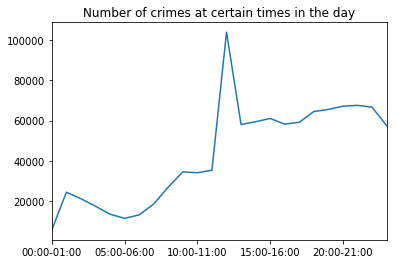

In [44]:
row = df22.iloc[0]
row.plot(kind = 'line', title = 'Number of crimes at certain times in the day')
plt.show()

This graph below shows the year in which there were the most crimes in Chicago. It appears 2002 is the year with the most crimes. One thing to note about 2018's position on the graph is that it is only for 2/3 months of the year.    

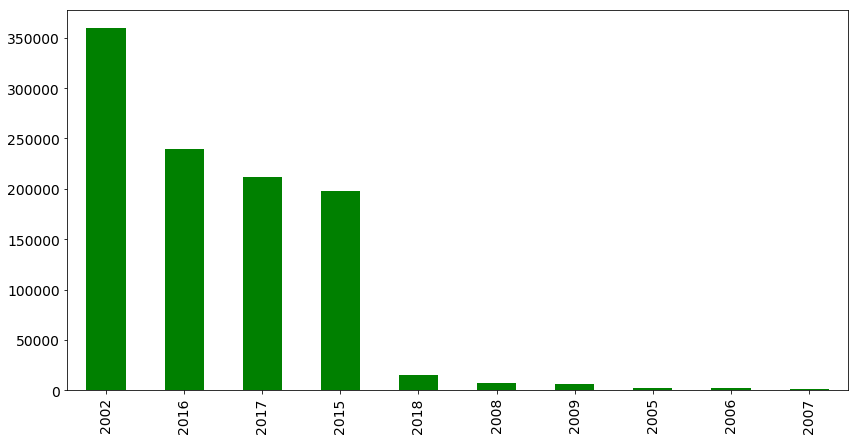

In [45]:
df8["Year"].value_counts().nlargest(10).plot(kind='bar',color='green',figsize=(14,7),fontsize=14)

This graph below shows where most crimes occur in the city. Unsurprisingly, most crimes occure on the streets. A surprise would be that more crimes do not happen in small retail stores as they would be seen as easy targets.

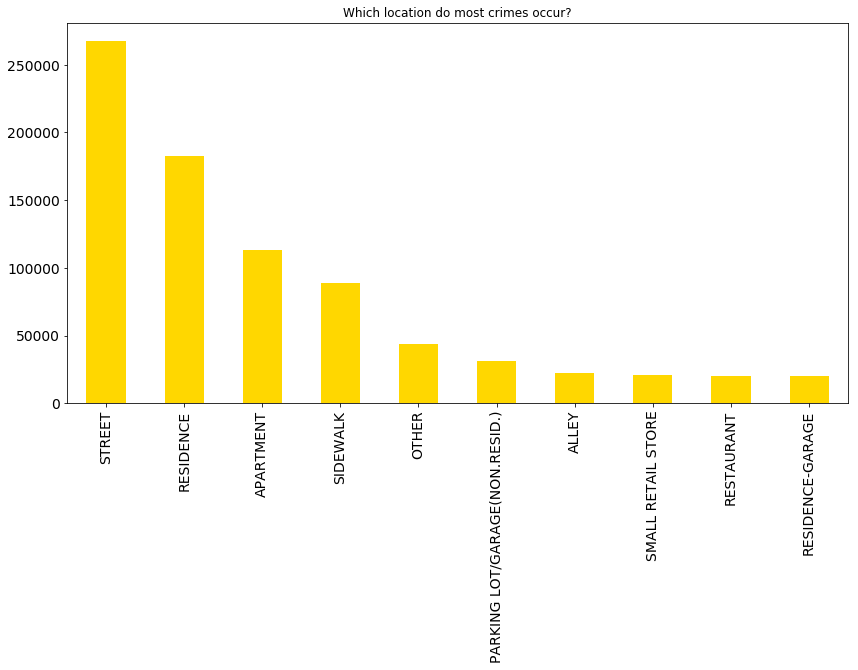

In [47]:
df8["Location_Description"].value_counts().nlargest(10).plot(kind='bar',color='gold',figsize=(14,7),fontsize=14, title = "Which location do most crimes occur?")

This graph below shows which community areas have the least amount of crimes. Chicago has 77 community areas in total(according to the dataset information).

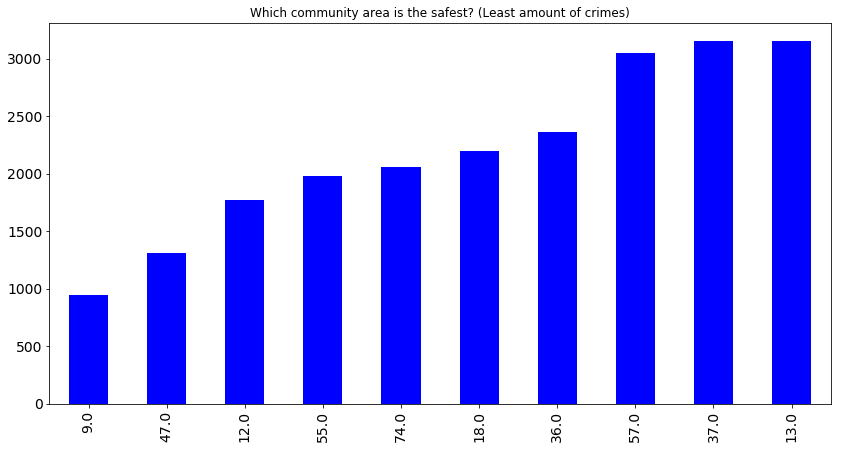

In [48]:
df8["Community_Area"].value_counts().nsmallest(10).plot(kind='bar',color='blue',figsize=(14,7),fontsize=14, title = 'Which community area is the safest? (Least amount of crimes)')

After parsing the date and time columns, I realised I could find the date when the most crimes occured. After discivering that 2002 was the year with the highest amount of crimes, I am not surprised to find the top 10 dates were in that year. The one I find most interesting is the second highest bar which is New Years Day 2002, because of possible new years resolutions that did not seem to apply to a lot of people. Another interesting point is that there are 3 dates(1st, 6th and 8th of Jan 2002) that all feature in the top 10 that are very close to each other

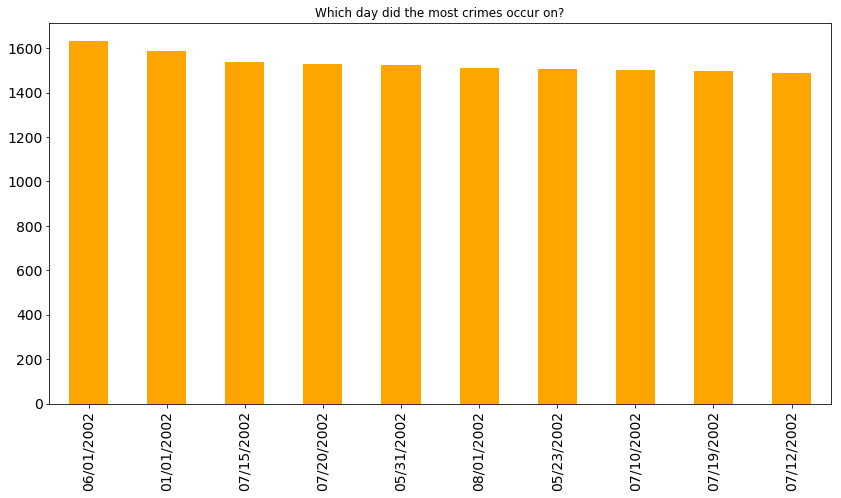

In [49]:
df8["Date"].value_counts().nlargest(10).plot(kind='bar',color='orange',figsize=(14,7),fontsize=14, title = "Which day did the most crimes occur on?")

In [50]:
df8["Date"].value_counts().nlargest(10)

06/01/2002    1632
01/01/2002    1587
07/15/2002    1537
07/20/2002    1527
05/31/2002    1523
08/01/2002    1510
05/23/2002    1508
07/10/2002    1500
07/19/2002    1498
07/12/2002    1490
Name: Date, dtype: int64

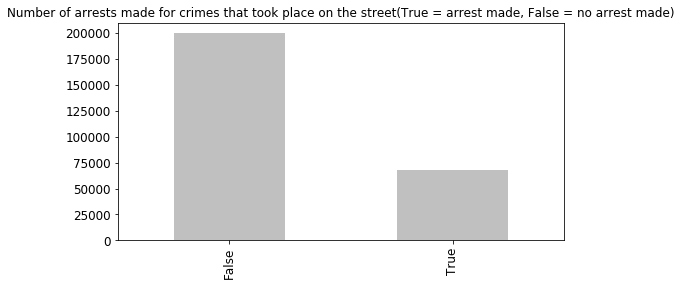

In [51]:
df8["Arrest"][df8["Location_Description"] == 'STREET'].value_counts().plot(kind='bar',color='silver',figsize=(8,4),fontsize=12, title = 'Number of arrests made for crimes that took place on the street(True = arrest made, False = no arrest made)')

This graph shows whether there were more arrest in residences due to domestic violence. Surprisingly there were not.

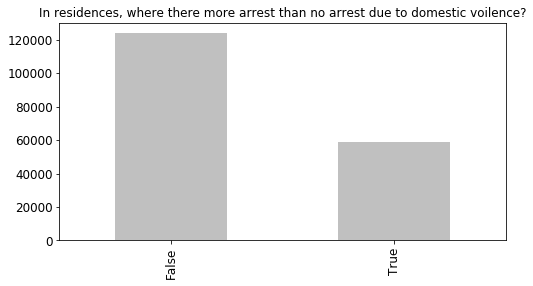

In [52]:
df8["Domestic"][df8["Location_Description"] == 'RESIDENCE'].value_counts().plot(kind='bar',color='silver',figsize=(8,4),fontsize=12, title = "In residences, where there more arrest than no arrest due to domestic voilence?")

Taking into account the default values I put in for community area(0.0), Community Area 25 is the worst area in terms of number of crimes. I filtered the dataset to see what years were particularly bad there. The past 3 calendar years and the most popular year all feature at the top, with 2018 the next one after them, presumably because 2018 is not complete yet

In [53]:
df33 = df8[df8["Community_Area"] == 25]

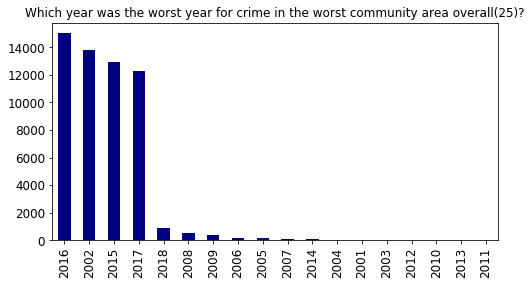

In [54]:
df33["Year"].value_counts().plot(kind='bar',color='navy',figsize=(8,4),fontsize=12, title = 'Which year was the worst year for crime in the worst community area overall(25)?')

In [55]:
df34 = df8[df8["Year"] == 2017]

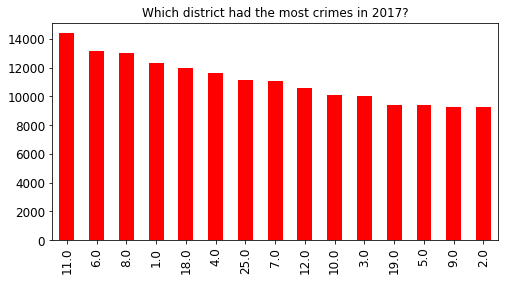

In [56]:
df34["District"].value_counts().nlargest(15).plot(kind='bar',color='red',figsize=(8,4),fontsize=12, title = "Which district had the most crimes in 2017?")

Conclusions: I felt that I found some very interesting insights with these graphs. Other questions for the dataset that would be interesting would be how the different types of crime occur in various places, and how the number of arrests in an area might change over a certain time period.